In [3]:
# !pip install opencv-python matplotlib
!pip install imageio

   ---------------------------------------- 0.0/315.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/315.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/315.4 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/315.4 kB 279.3 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/315.4 kB 476.3 kB/s eta 0:00:01
   ------------------ ------------------- 153.6/315.4 kB 654.6 kB/s eta 0:00:01
   --------------------------- ---------- 225.3/315.4 kB 860.2 kB/s eta 0:00:01
   --------------------------------- ---- 276.5/315.4 kB 850.6 kB/s eta 0:00:01
   -------------------------------------- 315.4/315.4 kB 887.0 kB/s eta 0:00:00


Start your code here

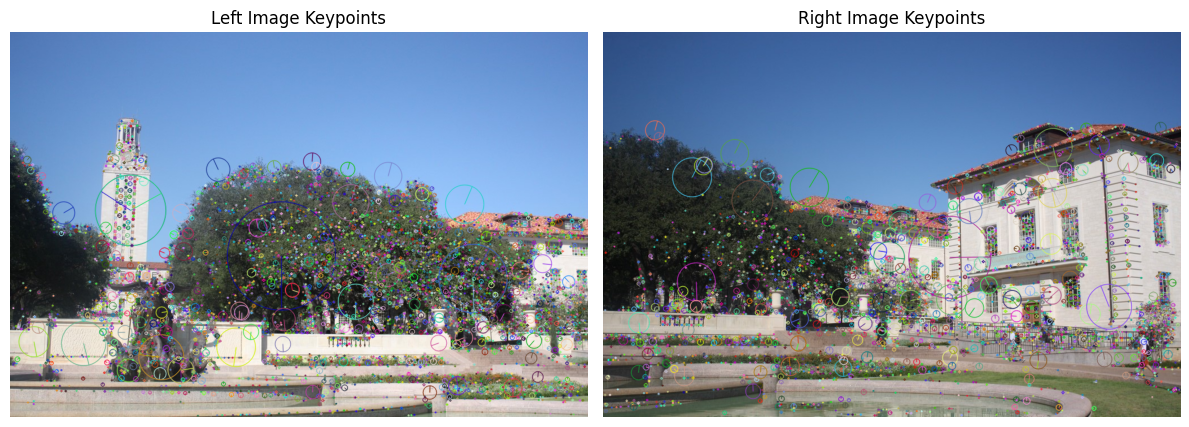

In [6]:
import cv2
import matplotlib.pyplot as plt

left_color = cv2.imread(r"D:\Computer-Vision-2025-Jan-25_19-39-22-456\Computer-Vision-2025-Jan-25_19-39-22-456\viewer\files\Lab03_code\Lab03_code\data\problem11\left.jpg")
right_color = cv2.imread(r"D:\Computer-Vision-2025-Jan-25_19-39-22-456\Computer-Vision-2025-Jan-25_19-39-22-456\viewer\files\Lab03_code\Lab03_code\data\problem11\right.jpg")

left_gray = cv2.cvtColor(left_color, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_color, cv2.COLOR_BGR2GRAY)


sift = cv2.SIFT_create()

kp_left, des_left = sift.detectAndCompute(left_gray, None)
kp_right, des_right = sift.detectAndCompute(right_gray, None)

left_with_kp = cv2.drawKeypoints(
    left_color, kp_left, None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)
right_with_kp = cv2.drawKeypoints(
    right_color, kp_right, None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Left image with keypoints
axes[0].imshow(cv2.cvtColor(left_with_kp, cv2.COLOR_BGR2RGB))
axes[0].set_title("Left Image Keypoints")
axes[0].axis("off")

# Right image with keypoints
axes[1].imshow(cv2.cvtColor(right_with_kp, cv2.COLOR_BGR2RGB))
axes[1].set_title("Right Image Keypoints")
axes[1].axis("off")

plt.tight_layout()
plt.show()



In [7]:
print(des_left)
print(type(des_left))
print(des_left.shape) #(5346, 128) means 5346 keypoints were detected, and each keypoint has a 128-dimensional SIFT descriptor.
print(len(kp_left)) 
print(kp_left)
print(left_gray.shape) # ()


[[ 30.  10.  19. ...   0.   0.   0.]
 [  0.  26. 139. ...   6.   0.   0.]
 [  0.   5.  73. ...  13.   8.  75.]
 ...
 [ 11.  10.  10. ...   0.   0.   0.]
 [ 22.   3.   1. ...  21.  36.   9.]
 [  0.   0.   0. ...   0.   0.   8.]]
<class 'numpy.ndarray'>
(5346, 128)
5346
(< cv2.KeyPoint 000002B2441569C0>, < cv2.KeyPoint 000002B2441E09C0>, < cv2.KeyPoint 000002B2444BD1E0>, < cv2.KeyPoint 000002B223A8BDE0>, < cv2.KeyPoint 000002B223A8B090>, < cv2.KeyPoint 000002B244223F00>, < cv2.KeyPoint 000002B24413EED0>, < cv2.KeyPoint 000002B223A80D50>, < cv2.KeyPoint 000002B223A80D20>, < cv2.KeyPoint 000002B223A80E10>, < cv2.KeyPoint 000002B223A80EA0>, < cv2.KeyPoint 000002B223A80F60>, < cv2.KeyPoint 000002B2444C2690>, < cv2.KeyPoint 000002B2444C25A0>, < cv2.KeyPoint 000002B244410AB0>, < cv2.KeyPoint 000002B2444107B0>, < cv2.KeyPoint 000002B2444109F0>, < cv2.KeyPoint 000002B244410DE0>, < cv2.KeyPoint 000002B223A857E0>, < cv2.KeyPoint 000002B223A85090>, < cv2.KeyPoint 000002B223A85210>, < cv2.KeyPoint 0

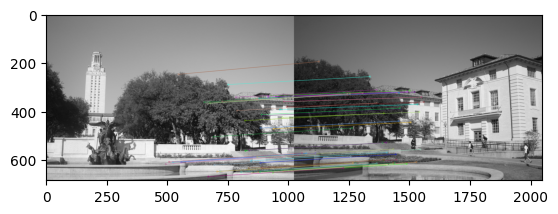

(<matplotlib.image.AxesImage at 0x2b223add5e0>, None)

In [8]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors.
matches = bf.match(des_left,des_right)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(left_gray,kp_left,right_gray,kp_right,matches[:50],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3),plt.show()

In [9]:
import numpy as np
src_pts = np.float32([kp_left[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp_right[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

#---------------------------------------------------------
# 2. Estimate homography using RANSAC
#    - 5.0 is the reprojection threshold (tune if needed)
#---------------------------------------------------------
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# 'mask' is an array of 0/1 values indicating outliers/inliers
# mask.shape == (N, 1)
if mask is not None:
    # Flatten mask to 1D for convenience
    inlier_mask = mask.ravel().tolist()

    #---------------------------------------------------------
    # 3. Count and print inliers and outliers
    #---------------------------------------------------------
    num_inliers = sum(inlier_mask)
    num_matches = len(inlier_mask)
    num_outliers = num_matches - num_inliers

    print("Homography Matrix (H):")
    print(H)
    print(f"Number of Matches:  {num_matches}")
    print(f"Number of Inliers:  {num_inliers}")
    print(f"Number of Outliers: {num_outliers}")
else:
    print("Homography could not be computed. (mask is None)")

Homography Matrix (H):
[[ 1.29951081e+00 -7.45704725e-02 -5.74323821e+02]
 [ 1.70033089e-01  1.22080460e+00 -1.68594381e+02]
 [ 2.80654497e-04  2.08220815e-05  1.00000000e+00]]
Number of Matches:  1826
Number of Inliers:  1126
Number of Outliers: 700


In [10]:
print(src_pts.shape)

(1826, 1, 2)


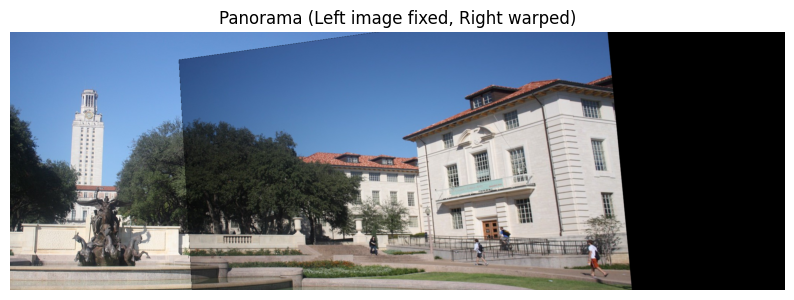

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


H_inv = np.linalg.inv(H)

# -- 2. Create a panorama canvas
h_left, w_left = left_color.shape[:2]
h_right, w_right = right_color.shape[:2]

panorama_width = w_left + w_right
panorama_height = max(h_left, h_right)

panorama = np.zeros((panorama_height, panorama_width, 3), dtype=np.uint8)

# -- 3. Warp right image to left image’s coordinates
warped_right = cv2.warpPerspective(
    right_color,
    H_inv,
    (panorama_width, panorama_height)
)

# -- 4. Place left image at (0,0)
panorama[0:h_left, 0:w_left] = left_color

# -- 5. Overlay the warped right image
mask = (warped_right > 0)
panorama[mask] = warped_right[mask]

# -- 6. Display the result
panorama_rgb = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(panorama_rgb)
plt.title("Panorama (Left image fixed, Right warped)")
plt.axis("off")
plt.show()



task2


chiiii
Best initial pair: ('A', 'B') with inliers = 372


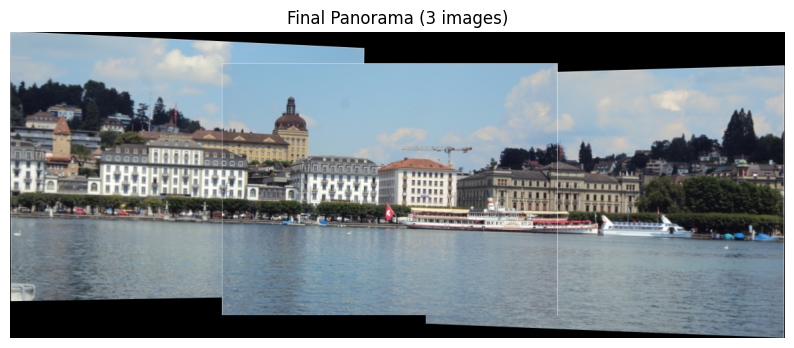

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_and_describe(image):
    """Detect SIFT keypoints and descriptors."""
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

def match_features(desc1, desc2):
    """Match SIFT descriptors using BFMatcher with L2 norm."""
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(desc1, desc2)
    return sorted(matches, key=lambda x: x.distance)

def compute_homography(img1, img2):
    """
    Compute homography from img1 to img2 using SIFT + BFMatcher + RANSAC.
    Returns (H, inliers_count).
    """
    # Convert to gray
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    kp1, des1 = detect_and_describe(gray1)
    kp2, des2 = detect_and_describe(gray2)
    
    matches = match_features(des1, des2)

    # Extract matched keypoints
    if len(matches) < 4:
        return None, 0  # Not enough matches to compute homography

    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

    # RANSAC
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    if H is None or mask is None:
        return None, 0
    inliers = np.sum(mask)

    return H, inliers

def stitch_pair(base_img, new_img, H):
    """
    Warp new_img onto base_img's coordinate system using homography H.
    base_img is assumed to be the reference (unchanged).
    Returns the merged panorama.
    """
    h_base, w_base = base_img.shape[:2]
    h_new, w_new = new_img.shape[:2]

    # Warp corners of new_img to find bounding box in base's space
    corners_new = np.float32([
        [0, 0],
        [w_new, 0],
        [w_new, h_new],
        [0, h_new]
    ]).reshape(-1,1,2)
    transformed_corners = cv2.perspectiveTransform(corners_new, H)

    # Figure out the size needed for the panorama
    all_corners = np.concatenate((transformed_corners, 
                                  np.float32([[0,0], [w_base,0], [w_base,h_base], [0,h_base]]).reshape(-1,1,2)), axis=0)
    
    [xmin, ymin] = np.int64(all_corners.min(axis=0).ravel() - 0.5)
    [xmax, ymax] = np.int64(all_corners.max(axis=0).ravel() + 0.5)
    
    # Translation to shift the panorama so that the top-left corner is (0,0)
    translation = np.array([[1, 0, -xmin],
                            [0, 1, -ymin],
                            [0, 0, 1]], dtype=np.float64)
    
    # Warp new_img with the adjusted homography
    panorama_w = xmax - xmin
    panorama_h = ymax - ymin

    merged = cv2.warpPerspective(new_img, translation @ H, (panorama_w, panorama_h))
    
    # Paste base_img into merged
    merged[ -ymin:h_base - ymin, -xmin:w_base - xmin ] = base_img

    return merged

# -----------
# MAIN EXAMPLE for 3 images: A, B, C
# -----------
imgA = cv2.imread(r"D:\Computer-Vision-2025-Jan-25_19-39-22-456\Computer-Vision-2025-Jan-25_19-39-22-456\viewer\files\Lab03_code\Lab03_code\data\problem12\1.JPG")
imgB = cv2.imread(r"D:\Computer-Vision-2025-Jan-25_19-39-22-456\Computer-Vision-2025-Jan-25_19-39-22-456\viewer\files\Lab03_code\Lab03_code\data\problem12\2.JPG")
imgC = cv2.imread(r"D:\Computer-Vision-2025-Jan-25_19-39-22-456\Computer-Vision-2025-Jan-25_19-39-22-456\viewer\files\Lab03_code\Lab03_code\data\problem12\3.JPG")


# 1) Compute pairwise homographies + inliers
#    H_{AB} means "warp A to B"
d= compute_homography(imgA,imgB)
print("chiiii")
pairs = {
    ("A", "B"): compute_homography(imgA, imgB),
    ("B", "A"): compute_homography(imgB, imgA),

    ("A", "C"): compute_homography(imgA, imgC),
    ("C", "A"): compute_homography(imgC, imgA),

    ("B", "C"): compute_homography(imgB, imgC),
    ("C", "B"): compute_homography(imgC, imgB),
}
def merge_third_image(pano, third_img_name, third_img):
    """
    Compute homography from the third_img to pano (or vice versa),
    then stitch them together. Return the final panorama.
    """
    H_third, inliers_third = compute_homography(pano, third_img)
    if H_third is not None:
        # stitch_pair(base_img, new_img, H)
        # Here, base_img = pano, new_img = third_img, H = ??? 
        # Because 'H_third' was computed as (pano -> third_img) or (third_img -> pano)
        # We must check how 'compute_homography' is set up. 
        # If it's "pano -> third_img", then to warp 'third_img' onto 'pano' we need the inverse.
        # Or if it's "pano -> third_img" we might do: stitch_pair(third_img, pano, H_third).
        # This depends on your code's convention. Let's assume we keep 
        # "first image -> second image" as the direction.
        
        # For simplicity, let's assume we computed homography as: 
        #   "pano -> third_img"
        # That means to place 'third_img' in 'pano' coords, we want the inverse.
        H_third_inv = np.linalg.inv(H_third)
        merged = stitch_pair(pano, third_img, H_third_inv)
        return merged
    else:
        # Attempt the other direction if desired
        # or just return pano if it fails
        return pano
# 2) Pick the best pair (max inliers)
best_pair = None
best_inliers = 0
for pair, (H, inliers) in pairs.items():
    if inliers > best_inliers:
        best_inliers = inliers
        best_pair = pair

print("Best initial pair:", best_pair, "with inliers =", best_inliers)

# Suppose best_pair is ("A", "B"). That means "Warp A -> B" is best
H_best, _ = pairs[best_pair]

if best_pair == ("A", "B"):
    # Means warp A->B
    H_best, _ = pairs[("A", "B")]
    panoAB = stitch_pair(imgB, imgA, H_best) 
    # The remaining image is "C"
    final_pano = merge_third_image(panoAB, "C", imgC)

elif best_pair == ("B", "A"):
    # Means warp B->A
    H_best, _ = pairs[("B", "A")]
    panoBA = stitch_pair(imgA, imgB, H_best)
    final_pano = merge_third_image(panoBA, "C", imgC)

elif best_pair == ("A", "C"):
    # Means warp A->C
    H_best, _ = pairs[("A", "C")]
    panoAC = stitch_pair(imgC, imgA, H_best)
    # remaining: "B"
    final_pano = merge_third_image(panoAC, "B", imgB)

elif best_pair == ("C", "A"):
    # Means warp C->A
    H_best, _ = pairs[("C", "A")]
    panoCA = stitch_pair(imgA, imgC, H_best)
    # remaining: "B"
    final_pano = merge_third_image(panoCA, "B", imgB)

elif best_pair == ("B", "C"):
    # Means warp B->C
    H_best, _ = pairs[("B", "C")]
    panoBC = stitch_pair(imgC, imgB, H_best)
    # remaining: "A"
    final_pano = merge_third_image(panoBC, "A", imgA)

elif best_pair == ("C", "B"):
    # Means warp C->B
    H_best, _ = pairs[("C", "B")]
    panoCB = stitch_pair(imgB, imgC, H_best)
    # remaining: "A"
    final_pano = merge_third_image(panoCB, "A", imgA)

else:
    print("No valid best pair found. Something went wrong.")

# 3) Display final result
plt.figure(figsize=(10,6))
plt.imshow(cv2.cvtColor(final_pano, cv2.COLOR_BGR2RGB))
plt.title("Final Panorama (3 images)")
plt.axis('off')
plt.show()


2 Problem2

C:\Users\PC\AppData\Local\Temp\ipykernel_13868\2452183115.py:111: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(r'D:\Computer-Vision-2025-Jan-25_19-39-22-456\Computer-Vision-2025-Jan-25_19-39-22-456\viewer\files\Lab03_code\Lab03_code\data\problem2\problem2.png')


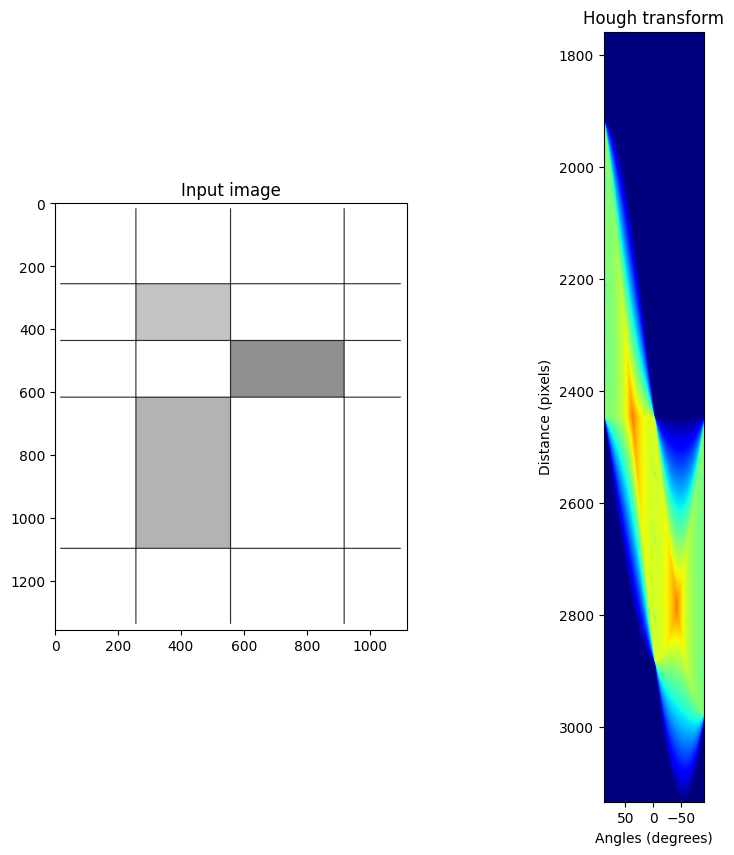

In [9]:
import numpy as np
import imageio
import math

def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)


def hough_line(img, angle_step=1, lines_are_white=True, value_threshold=5):
    """
    Hough transform for lines

    Input:
    img - 2D binary image with nonzeros representing edges
    angle_step - Spacing between angles to use every n-th angle
                 between -90 and 90 degrees. Default step is 1.
    lines_are_white - boolean indicating whether lines to be detected are white
    value_threshold - Pixel values above or below the value_threshold are edges

    Returns:
    accumulator - 2D array of the hough transform accumulator
    theta - array of angles used in computation, in radians.
    rhos - array of rho values. Max size is 2 times the diagonal
           distance of the input image.
    """
    # Rho and Theta ranges
    thetas = np.deg2rad(np.arange(-90.0, 90.0, angle_step))
    width, height = img.shape
    diag_len = int(round(math.sqrt(width * width + height * height)))
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)

    # Cache some resuable values
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    # Hough accumulator array of theta vs rho
    accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint8)
    # (row, col) indexes to edges
    are_edges = img > value_threshold if lines_are_white else img < value_threshold
    y_idxs, x_idxs = np.nonzero(are_edges)

    # Vote in the hough accumulator
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

        for t_idx in range(num_thetas):
            # Calculate rho. diag_len is added for a positive index
            rho = diag_len + int(round(x * cos_t[t_idx] + y * sin_t[t_idx]))
            accumulator[rho, t_idx] += 1

    return accumulator, thetas, rhos

def fast_hough_line(img, angle_step=1, lines_are_white=True, value_threshold=5):
    """hough line using vectorized numpy operations,
    may take more memory, but takes much less time"""
    # Rho and Theta ranges
    thetas = np.deg2rad(np.arange(-90.0, 90.0, angle_step)) #can be changed
    #width, height = col.size  #if we use pillow
    width, height = img.shape
    diag_len = int(np.ceil(np.sqrt(width * width + height * height)))   # max_dist
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)

    # Cache some resuable values
    cos_theta = np.cos(thetas)
    sin_theta = np.sin(thetas)
    num_thetas = len(thetas)

    # Hough accumulator array of theta vs rho
    accumulator = np.zeros((2 * diag_len, num_thetas))
    are_edges = img > value_threshold if lines_are_white else img < value_threshold
    #are_edges = cv2.Canny(img,50,150,apertureSize = 3)
    y_idxs, x_idxs = np.nonzero(are_edges)  # (row, col) indexes to edges
    # Vote in the hough accumulator
    xcosthetas = np.dot(x_idxs.reshape((-1,1)), cos_theta.reshape((1,-1)))
    ysinthetas = np.dot(y_idxs.reshape((-1,1)), sin_theta.reshape((1,-1)))
    rhosmat = np.round(xcosthetas + ysinthetas) + diag_len
    rhosmat = rhosmat.astype(np.int16)
    for i in range(num_thetas):
        rhos,counts = np.unique(rhosmat[:,i], return_counts=True)
        accumulator[rhos,i] = counts
    return accumulator, thetas, rhos

def show_hough_line(img, accumulator, thetas, rhos, save_path=None):
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(1, 2, figsize=(10, 10))

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].axis('image')

    ax[1].imshow(
        accumulator, cmap='jet',
        extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
    ax[1].set_aspect('equal', adjustable='box')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

    # plt.axis('off')
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()


if __name__ == '__main__':
    # imgpath = 
    img = imageio.imread(r'D:\Computer-Vision-2025-Jan-25_19-39-22-456\Computer-Vision-2025-Jan-25_19-39-22-456\viewer\files\Lab03_code\Lab03_code\data\problem2\problem2.png')
    if img.ndim == 3:
        img = rgb2gray(img)
    accumulator, thetas, rhos = fast_hough_line(img)
    show_hough_line(img, accumulator, thetas, rhos, save_path='output.png')

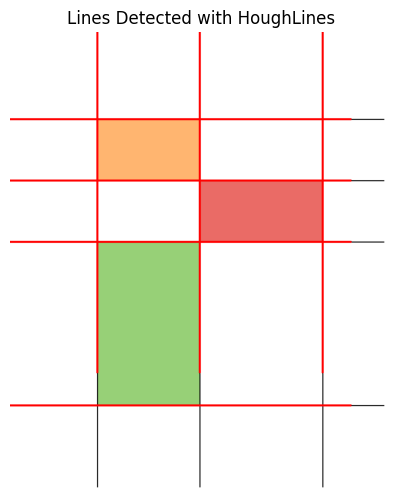

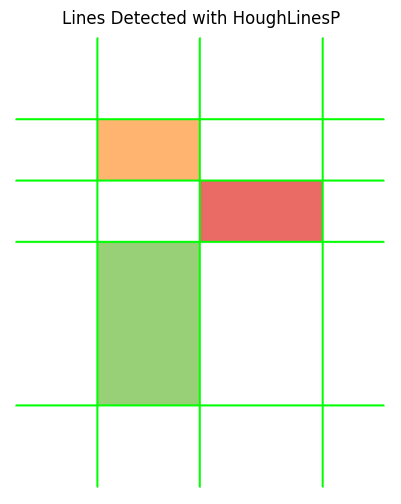

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (update the path as needed) and convert to grayscale.
img = cv2.imread(r'D:\Computer-Vision-2025-Jan-25_19-39-22-456\Computer-Vision-2025-Jan-25_19-39-22-456\viewer\files\Lab03_code\Lab03_code\data\problem2\problem2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Use Canny edge detector to find edges.
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# ----- Standard Hough Transform (HoughLines) -----
# Parameters: rho resolution = 1 pixel, theta resolution = 1 degree (in radians),
# and a threshold for minimum votes.
lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=150)
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        # These values determine line segment endpoints for drawing the line.
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Show the result for HoughLines.
plt.figure(figsize=(10, 6))
plt.title("Lines Detected with HoughLines")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


# ----- Probabilistic Hough Transform (HoughLinesP) -----
# Reload the original image to draw the new lines on a fresh copy.
img2 = cv2.imread(r'D:\Computer-Vision-2025-Jan-25_19-39-22-456\Computer-Vision-2025-Jan-25_19-39-22-456\viewer\files\Lab03_code\Lab03_code\data\problem2\problem2.png')
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
edges2 = cv2.Canny(gray2, 50, 150, apertureSize=3)

# Parameters: rho = 1 pixel, theta = 1 degree (in radians),
# threshold (minimum votes), minimum line length, and maximum allowed gap.
linesP = cv2.HoughLinesP(edges2, 1, np.pi / 180, threshold=80, minLineLength=30, maxLineGap=10)
if linesP is not None:
    for line in linesP:
        x1, y1, x2, y2 = line[0]
        cv2.line(img2, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Show the result for HoughLinesP.
plt.figure(figsize=(10, 6))
plt.title("Lines Detected with HoughLinesP")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [16]:
print(linesP)

[[[ 257 1336  257   16]]

 [[ 917 1336  917   16]]

 [[ 254 1334  254   18]]

 [[  16  257 1096  257]]

 [[ 554 1334  554   18]]

 [[ 914 1334  914   18]]

 [[ 557 1336  557   16]]

 [[  18 1094 1094 1094]]

 [[  16  437 1096  437]]

 [[  18  614 1094  614]]

 [[  18  434 1094  434]]

 [[  18  254 1094  254]]

 [[  16 1097 1096 1097]]

 [[  16  617 1096  617]]]


In [18]:
import cv2
import numpy as np

def compute_intersection(line1, line2, epsilon=1e-6):
    """
    Computes the intersection point of two lines, where each line is defined
    by two endpoints [x1, y1, x2, y2]. The lines are considered as infinite.
    
    Parameters:
        line1 : List or array with 4 elements [x1, y1, x2, y2].
        line2 : List or array with 4 elements [x3, y3, x4, y4].
        epsilon: A small value to avoid division by zero in case of parallel lines.
        
    Returns:
        (x, y) tuple of the intersection point, or None if the lines are nearly parallel.
    """
    x1, y1, x2, y2 = line1
    x3, y3, x4, y4 = line2

    # Compute the denominator of the intersection formulas.
    denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if abs(denom) < epsilon:
        # Lines are nearly parallel.
        return None

    # Compute determinants
    det1 = x1 * y2 - y1 * x2
    det2 = x3 * y4 - y3 * x4

    # Compute the intersection point using the determinant formula.
    x = (det1 * (x3 - x4) - (x1 - x2) * det2) / denom
    y = (det1 * (y3 - y4) - (y1 - y2) * det2) / denom

    return (x, y)

def draw_intersections(image, linesP, radius=5, color=(0, 0, 255), thickness=-1):
    """
    Draws the intersections between all unique pairs of lines (derived from HoughLinesP)
    on a copy of the input image.
    
    Parameters:
        image   : The input image (as a NumPy array).
        linesP  : The output from cv2.HoughLinesP with shape (N,1,4).
        radius  : Radius of the circle to draw at each intersection.
        color   : Color of the drawn circle (B, G, R).
        thickness: Thickness of the circle outline (-1 for a filled circle).
    
    Returns:
        image_with_intersections: The image copy with intersection points drawn.
        intersections         : A list of intersection points [(x, y), ...].
    """
    # Make a copy of the image to draw on.
    image_with_intersections = image.copy()
    
    # Convert linesP from shape (N,1,4) to a list of lines.
    lines = [line[0] for line in linesP]
    
    intersections = []
    num_lines = len(lines)
    
    # Compute intersections for every unique pair of lines.
    for i in range(num_lines):
        for j in range(i + 1, num_lines):
            pt = compute_intersection(lines[i], lines[j])
            if pt is not None:
                x, y = pt
                # Convert to integer coordinates for drawing.
                ix, iy = int(round(x)), int(round(y))
                # (Optional) Check if the intersection lies within the image boundaries.
                if 0 <= ix < image_with_intersections.shape[1] and 0 <= iy < image_with_intersections.shape[0]:
                    intersections.append((ix, iy))
                    cv2.circle(image_with_intersections, (ix, iy), radius, color, thickness)
                    
    return image_with_intersections, intersections

image = cv2.imread(r'D:\Computer-Vision-2025-Jan-25_19-39-22-456\Computer-Vision-2025-Jan-25_19-39-22-456\viewer\files\Lab03_code\Lab03_code\data\problem2\problem2.png')
image_with_ints, intersections = draw_intersections(image, linesP)

# Display the result using OpenCV's imshow (or use matplotlib if preferred).
cv2.imshow("Intersections", image_with_ints)
cv2.waitKey(0)
cv2.destroyAllWindows()